# Inteligentná analýza údajov
## Zadanie 1 - profiles.csv
### Michal Greguš, Samuel Kováč

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import math
import datetime as dt 
from datetime import date
from datetime import datetime

data = pd.read_csv("data/profiles.csv", sep = '\t')

## 1.Základný opis dát spolu s ich charakteristikami

Dataset obsahuje informácie o osobách, ktorých laboratórne výsledky sú v datasete Labor.

Pre jednotlivé osoby obsahuje informácie ako meno, ssn, dátum narodenia, rasa, pohlavie, spoločnosť a pozícia v ktorej pracuju a iné.

Pričom jednotlivé záznamy možno jednoznačne identifikovať na základe kombinácie mena a ssn.
Obsahuje 3092 záznamov a 9 atribútov pre každý záznam.

In [2]:
data.head()

,Unnamed: 0,job,company,sex,residence,blood_group,ssn,name,birthdate,race
0,0,Chief Marketing Officer,"Torres, Parker and Fisher",F,"584 Chan Unions\r\nNew Robertside, MN 27858",B+,318-35-2572,Lori Delgado,"04/12/1988, 00:00:00",White
1,1,Physiological scientist,Lopez PLC,F,"116 Ryan Extensions\r\nJonesport, ND 67361",B-,528-41-8966,Laura Jones PhD,1919/12/22,White
2,2,Academic librarian,"Aguilar, Garcia and Baker",F,"5895 Richard Divide\r\nWest Ericside, CO 97342",B+,626-08-5588,Alexandra Hess,1924/02/28,Black
3,3,Field seismologist,Greer Ltd,M,"51331 Singh Garden\r\nMichaelmouth, CO 07747",O-,061-61-2641,Nicholas Russo,1991/12/01,White
4,4,"Programmer, applications",Valenzuela and Sons,M,"625 Donna Pines Suite 734\r\nNew Brenda, TX 54807",AB-,742-97-6478,John Arnold,1983-12-28,Asian


Dataset obsahuje nasledovné atribúty

In [3]:
data.columns

Index(['Unnamed: 0', 'job', 'company', 'sex', 'residence', 'blood_group',
       'ssn', 'name', 'birthdate', 'race'],
      dtype='object')

Prvý nepomenovaný stĺpec je vlastne index záznamov, môžme ho odstrániť.

In [4]:
data = data.drop(data.columns[0],axis=1)

### Počet záznamov a atribútov

In [5]:
print('Počet záznamov : ',data.shape[0] , '\nPočet atribútov: ', data.shape[1])

Počet záznamov :  3092 
Počet atribútov:  9


Po odstránení nepomenovaného atribútu nám teda zostalo **9 atribútov** pre **3092 záznamov**, môžme si to overiť pomocou *data.tail()* :

In [6]:
data.tail()

,job,company,sex,residence,blood_group,ssn,name,birthdate,race
3087,Architectural technologist,Martinez and Sons,F,"1884 Laura Underpass Apt. 769\r\nBrycehaven, I...",O+,587-63-8032,Jennifer Nguyen,11 Jul 1937,White
3088,Research scientist (physical sciences),Thomas LLC,M,"26643 Crawford Fort\r\nRileybury, WI 57976",O-,401-39-3009,Andrew Garcia,"01/19/1968, 00:00:00",White
3089,Automotive engineer,"Wood, Butler and Turner",M,USS Maldonado\r\nFPO AP 64712,B-,274-09-7323,Carlos Ball,"03/20/1994, 00:00:00",White
3090,"Scientist, biomedical",Curtis-Schneider,M,"21707 Jamie Row Apt. 725\r\nNew Jeffrey, AK 34738",A-,267-99-0291,Terry Cardenas,22 Aug 1974,Black
3091,Advice worker,"Alvarez, Parks and Flores",M,"95321 Kim Estate\r\nSouth Sandra, DE 14223",AB+,058-10-7454,Adam Green,1973-09-17,Black


Dataset neobsahuje žiadne záznamy s chýbajúcimi hodnotami

In [7]:
data.isnull().sum()

job            0
company        0
sex            0
residence      0
blood_group    0
ssn            0
name           0
birthdate      0
race           0
dtype: int64

Dataset neobsahuje žiadne duplicitné záznamy

In [8]:
data.duplicated().sum()

0

### Dátové typy
Všetky dátové typy sú v tomto prípade typu string, pričom dátum narodenia **birthdate** je v rôznych formátoch, preto by sme ho mohli štandardizovať na jeden formát dátumu typu ISO

In [9]:
data.dtypes

job            object
company        object
sex            object
residence      object
blood_group    object
ssn            object
name           object
birthdate      object
race           object
dtype: object

### Deskriptívne štatistiky významných atribútov

In [10]:
data.describe(include="all")

,job,company,sex,residence,blood_group,ssn,name,birthdate,race
count,3092,3092,3092,3092,3092,3092,3092,3092,3092
unique,633,2886,2,3092,8,3092,3038,3058,8
top,Chiropodist,Smith Group,F,"584 Chan Unions\r\nNew Robertside, MN 27858",A+,318-35-2572,Jessica Brown,1984-11-11,White
freq,12,5,1590,1,424,1,3,2,1619


Môžme si všimnúť, že v žiadnom atribúte nechýbajú záznamy.

### Atribút job

In [11]:
data.job.describe()

count            3092
unique            633
top       Chiropodist
freq               12
Name: job, dtype: object

Jedná sa o kategorický atribút. Vidíme že záznamy obsahujú **633** jedinečných záznamov, pričom záznam **Chiropodist** sa v záznamoch objavil najviac a to 12 krát.

### Atribút company

In [12]:
data.company.describe()

count            3092
unique           2886
top       Smith Group
freq                5
Name: company, dtype: object

Jedná sa o kategorický atribút. Vidíme že záznamy obsahujú 2886 jedinečných záznamov, pričom najviac pacientov pracuje pre Smith Group, konkrétne 5.

### Atribút sex

In [13]:
data.sex.describe()

count     3092
unique       2
top          F
freq      1590
Name: sex, dtype: object

In [14]:
data['sex'].value_counts()

F    1590
M    1502
Name: sex, dtype: int64

Text(0.5, 1.0, 'Zastúpenie mužov a žien v testovanej skupine')

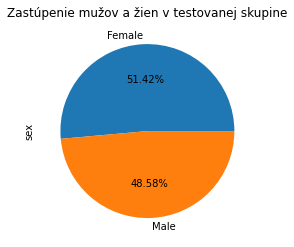

In [15]:
data.sex.value_counts().plot.pie(labels=["Female","Male"], autopct='%1.2f%%').set_title('Zastúpenie mužov a žien v testovanej skupine')

Jedná sa o kategorický atribút. Vidíme že v záznamoch sa nachádza viac žien(1590) ako mužov(1502) aj keď len s malým rozdielom

### Atribút residence

In [16]:
data.residence.describe()

count                                            3092
unique                                           3092
top       584 Chan Unions\r\nNew Robertside, MN 27858
freq                                                1
Name: residence, dtype: object

Jedná sa o kategorický atribút.

### Atribút blood_group

In [17]:
data.blood_group.describe()

count     3092
unique       8
top         A+
freq       424
Name: blood_group, dtype: object

In [18]:
data.blood_group.unique().tolist()

['B+', 'B-', 'O-', 'AB-', 'A-', 'A+', 'O+', 'AB+']

Jedná sa o kategorický atribút. V záznamoch sa vyskytuje **8 rôznych krvných skupín** pacientov. 

Početnosť pacientov s danou krvnou skupinou je nasledovná.

Text(0.5, 1.0, 'Početnosť pacientov s danou krvnou skupinou')

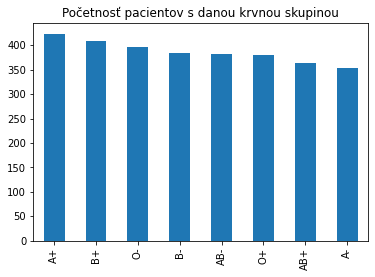

In [19]:
data.blood_group.value_counts().plot(kind='bar').set_title('Početnosť pacientov s danou krvnou skupinou')

In [20]:
data['blood_group'].value_counts()

A+     424
B+     408
O-     396
B-     384
AB-    383
O+     380
AB+    363
A-     354
Name: blood_group, dtype: int64

### Atribút ssn

In [21]:
data.ssn.describe()

count            3092
unique           3092
top       318-35-2572
freq                1
Name: ssn, dtype: object

**Ako možno vidieť každé *ssn* sa vyskytuje v záznamoch s početnosťou 1, preto budeme tento atribút používať ako identifikátor záznamu.**

### Atribút name

In [22]:
data.name.describe()

count              3092
unique             3038
top       Jessica Brown
freq                  3
Name: name, dtype: object

Jedná sa o kategorický atribút.

### Atribút birtdate

In [23]:
data.birthdate.describe()

count           3092
unique          3058
top       1984-11-11
freq               2
Name: birthdate, dtype: object

In [24]:
data.birthdate.head(20)

0     04/12/1988, 00:00:00
1               1919/12/22
2               1924/02/28
3               1991/12/01
4               1983-12-28
5     05/10/2011, 00:00:00
6     07/30/1982, 00:00:00
7              03 Mar 1995
8               2001/03/04
9     12/02/1915, 00:00:00
10              1920/06/13
11             03 Apr 1960
12              1923-05-19
13              2012/05/11
14              1983-08-11
15    03/14/2008, 00:00:00
16              1934/01/11
17    08/27/1912, 00:00:00
18             13 May 1932
19              1919/03/01
Name: birthdate, dtype: object

Hodnoty birthdate sú momentálne v rôznych formátoch tieto dátumy preto preformátujeme aby mali jednotný formát

### Atribút race

In [25]:
data.race.describe()

count      3092
unique        8
top       White
freq       1619
Name: race, dtype: object

In [26]:
data.race.unique().tolist()

['White', 'Black', 'Asian', 'Hawaiian', 'Indian', 'blsck', 'black', 'white']

Na grafe vidíme rozdelenie záznamov atribútu **race**, tiež vidíme viaceré problémy v týchto záznamoch - preklep v záznamoch **blsck** a tiež záznamy s malým začiatočným písmenom (**black**, **white**), pričom predpokladáme, že tieto pomenovávajú tie isté záznamy. Jedná sa o kategorický atribút.

Text(0.5, 1.0, 'Početnosť zastúpenia obyvateľov podľa rasy')

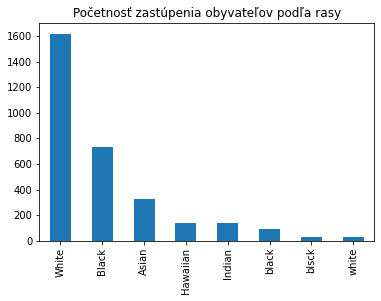

In [27]:
data.race.value_counts().plot.bar().set_title('Početnosť zastúpenia obyvateľov podľa rasy')

## 2. Chyby v údajoch a navrhnuté riešenie

### Atribút birthdate

Ako možno vidieť aj z výpisu prvých niekoľko riadkov problémom hodnôt tohto atribútu je, že je zapísaný v niekoľkých rôznych formátoch. Preto sme sa rozhodli tieto hodnoty upraviť do jednotného formátu, aby sme vedeli porovnávať a analyzovať jednotlivé hodnoty tohto atribútu.

In [28]:
data['birthdate'] = pd.to_datetime(data['birthdate']).dt.strftime('%Y-%m-%d')
data.birthdate.describe()

count           3092
unique          2985
top       1976-02-19
freq               3
Name: birthdate, dtype: object

### Nový Atribút age

Aby sme vedeli pacientov vhodne zaradiť do skupín podľa veku rozhodli sme sa pridať atribút age, ktorý bude určovať vek pacienta.

In [29]:
data['age'] = pd.to_datetime(data.birthdate)
data['age'] = pd.Timestamp.now() - data['age']
data['age'] = data['age'] / np.timedelta64(1, 'Y')
data['age'] = data.age.apply(math.floor)

Primerný vek nášho pacienta je teda takmer 58 rokov. 

In [30]:
data['age'].describe()

count    3092.000000
mean       57.908150
std        33.260848
min         0.000000
25%        29.000000
50%        58.000000
75%        87.000000
max       116.000000
Name: age, dtype: float64

V histograme môžme vidieť, že rozdelenie pacientov podľa veku je pomerne rovnomerné resp. každá špecifikovaná veková kategória je zastúpená približne rovnako.

Text(0.5, 1.0, 'Histogram rozdelenia obyvateľov podľa veku')

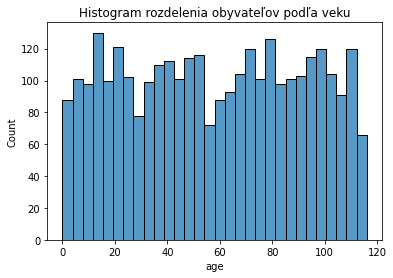

In [31]:
sns.histplot(data['age'], bins=30).set_title('Histogram rozdelenia obyvateľov podľa veku')

### Atribút race

In [32]:
data.race.unique().tolist()

['White', 'Black', 'Asian', 'Hawaiian', 'Indian', 'blsck', 'black', 'white']

Premenovanie hodnôt atribútu race, aby boli hodnoty konzistentné teda aby tá istá hodnota bola pomenovaná rovnako

In [33]:
data['race'] = data['race'].str.replace('blsck','Black')
data['race'] = data['race'].str.replace('black','Black')
data['race'] = data['race'].str.replace('white','White')

Upravený dataset a početnosti jednotlivých osôb podľa rasy.

V záznamoch sa vyskytuje **5 rôznych rás pacientov.**

In [34]:
data.race.unique().tolist()

['White', 'Black', 'Asian', 'Hawaiian', 'Indian']

Text(0.5, 1.0, 'Početnosť zastúpenia obyvateľov podľa rasy')

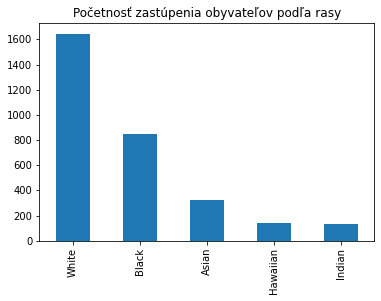

In [35]:
data.race.value_counts().plot.bar().set_title('Početnosť zastúpenia obyvateľov podľa rasy')

In [36]:
data['race'].value_counts()

White       1646
Black        848
Asian        324
Hawaiian     138
Indian       136
Name: race, dtype: int64

Z dát možno vidieť, že najpočetnejšou skupinou pacientov sú belosi nasledovaný černochmi, ktorý sú pomerne vo veľkom zastúpení a následne 3 marginálne skupiny ako Asiati, Hawajčania a Idiáni.

#### Uloženie upraveného datasetu

In [37]:
data.to_csv('data/profiles_fixed.csv', sep='\t', index=False, encoding='utf-8')